1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Disease Stage: Moderate Impairment
Confidence: 100.00%


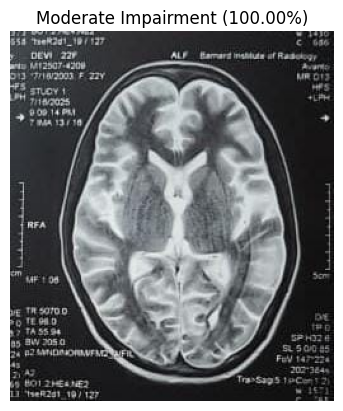

In [3]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model(r"c:\Users\saike\Downloads\medimg_py397\alzheimer_cnn.keras")

# Define class labels (update order based on your model training)
class_labels = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

# Function to load and preprocess the image
def load_and_prepare_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, color_mode='grayscale', target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Prediction function
def predict_stage(img_path):
    img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class] * 100

    print(f"Predicted Disease Stage: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

    # Display image
    img_display = image.load_img(img_path)
    plt.imshow(img_display, cmap='gray')
    plt.title(f"{class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# --- Example usage ---
# Replace path with your input image
predict_stage(r"C:\Users\saike\Downloads\medimg_py397\WhatsApp Image 2025-12-14 at 6.07.36 PM.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

--- Prediction Probabilities ---
Mild Impairment          : 0.00%
Moderate Impairment      : 0.00%
No Impairment            : 99.99%
Very Mild Impairment     : 0.01%

--- Final Prediction ---
Predicted Disease Stage: No Impairment
Confidence: 99.99%


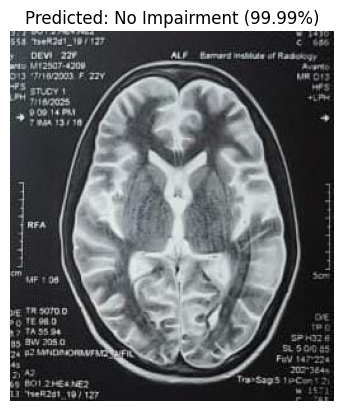

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model(r"c:\Users\saike\Downloads\medimg_py397\Final_final_reduced.keras")

# Define class labels (make sure order matches your training order)
class_labels = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

# Function to load and preprocess the image
def load_and_prepare_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, color_mode='grayscale', target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Prediction function
def predict_stage(img_path):
    img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)[0]

    # Find predicted class and confidence
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class] * 100

    # --- Display all class probabilities ---
    print("\n--- Prediction Probabilities ---")
    for i, cls in enumerate(class_labels):
        print(f"{cls:<25}: {prediction[i]*100:.2f}%")

    print("\n--- Final Prediction ---")
    print(f"Predicted Disease Stage: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

    # --- Display image with title ---
    img_display = image.load_img(img_path)
    plt.imshow(img_display, cmap='gray')
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# --- Example usage ---
predict_stage(r"C:\Users\saike\Downloads\medimg_py397\WhatsApp Image 2025-12-14 at 6.07.36 PM.jpeg")


Model loaded. Output classes: 4

Testing image: C:\Users\saike\Downloads\medimg_py397\WhatsApp Image 2025-12-14 at 5.52.56 PM.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

--- Prediction Probabilities ---
Mild Impairment          : 0.00%
Moderate Impairment      : 0.26%
No Impairment            : 79.75%
Very Mild Impairment     : 19.99%

--- Final Prediction ---
Predicted Stage       : No Impairment
Prediction Confidence : 79.75%


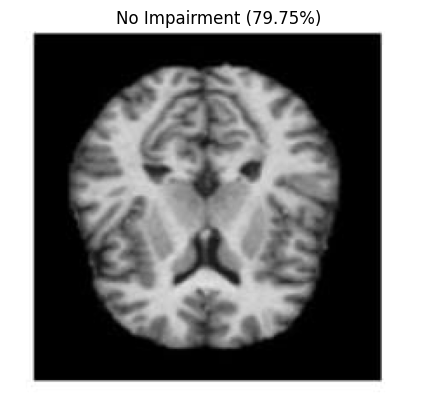

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# -------------------------------------------------------------
# Load your trained model
# -------------------------------------------------------------
model = load_model(r"c:\Users\saike\Downloads\medimg_py397\Final_final_reduced.keras", compile=False)

# -------------------------------------------------------------
# Define class labels (exactly 4 classes)
# Make sure the order matches training folder alphabetical order:
# Mild Impairment, Moderate Impairment, No Impairment, Very Mild Impairment
# -------------------------------------------------------------
class_labels = [
    "Mild Impairment",
    "Moderate Impairment",
    "No Impairment",
    "Very Mild Impairment"
]

print("Model loaded. Output classes:", len(class_labels))

# -------------------------------------------------------------
# Preprocess image (same as training)
# -------------------------------------------------------------
def load_and_prepare_image(img_path, target_size=(128, 128)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Error: Cannot read image " + img_path)

    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0

    img = np.expand_dims(img, axis=-1)   # (128,128,1)
    img = np.expand_dims(img, axis=0)    # (1,128,128,1)
    return img

# -------------------------------------------------------------
# Prediction function
# -------------------------------------------------------------
def predict_stage(img_path):
    print("\nTesting image:", img_path)

    img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)[0]

    # Show all class probabilities
    print("\n--- Prediction Probabilities ---")
    for i, cls in enumerate(class_labels):
        print(f"{cls:<25}: {prediction[i] * 100:.2f}%")

    # Get final output
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class] * 100

    print("\n--- Final Prediction ---")
    print(f"Predicted Stage       : {class_labels[predicted_class]}")
    print(f"Prediction Confidence : {confidence:.2f}%")

    # Display the image
    img_display = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_display, cmap='gray')
    plt.title(f"{class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# -------------------------------------------------------------
# Example usage:
# Put **ANY** MRI image here (trained or new dataset)
# -------------------------------------------------------------
predict_stage(r"C:\Users\saike\Downloads\medimg_py397\archive (3)\combined_images\NonDemented\nonDem956.jpg")
